# How to determine the parallel resistor for the desired current amplitudes

The current amplitude for each channel is adjustable by an 8-bit digital potentiometer. Note that the current source's output is highly nonlinear and needs to be tailored to current amplitudes you are interested in. Therefore, we included the option of connecting a resistor parallel to each digital potentiometer’s adjustable resistor R_WB. Since we are interested in a high resolution between 42 - 100 μA, we added a 30 kΩ resistor in parallel. If you are interested in other current amplitudes with a high accuracy, you have to adapt the parallel resistor accordingly.  The following calculations will help you to figure out the proper parallel resistor for your experimental setup. As STELLA provides two channels, you have to adapt the parallel resistor for each channel. In the EAGLE-Schematic the parallel resistors are labeled as R9 and R10. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itable

## Digital Potentiometer (AD5142)

In [2]:
D = np.arange(256)
R_AB = 100000 # end-to-end resistance [Ω]
R_W = 130 # wiper resistance [Ω]

In [3]:
R_WB = D / 256 * R_AB + R_W

In [4]:
R_WB_upper_bound = R_WB + R_WB * 0.08

In [5]:
R_WB_lower_bound = R_WB - R_WB * 0.08

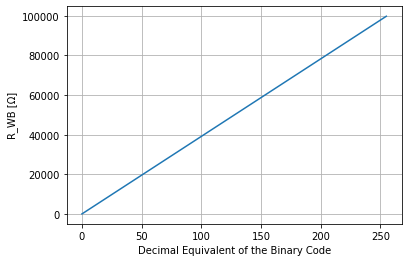

In [6]:
plt.plot(D, R_WB)
plt.grid()
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.ylabel('R_WB [Ω]')
plt.show()

In [7]:
R_parallel = 30000 # change the value of R_parallel to adapt the current amplitude range [Ω]
R_new = R_WB * R_parallel / ( R_WB + R_parallel)
R_new_upper_bound = R_WB_upper_bound * R_parallel / ( R_WB_upper_bound + R_parallel)
R_new_lower_bound = R_WB_lower_bound * R_parallel / ( R_WB_lower_bound + R_parallel)

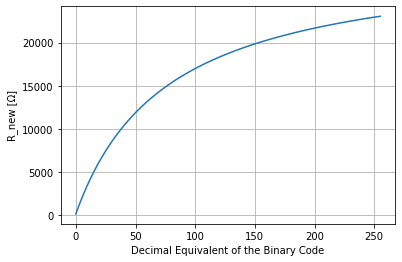

In [8]:
plt.plot(D, R_new)
plt.grid()
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.ylabel('R_new [Ω]')
plt.show()

## Current Source  (PSSI2021SAY)

In [9]:
I_OUT = 0.617 / R_new + 15e-6 # [A]
I_OUT_upper_bound = 0.617 / R_new_upper_bound + 15e-6 # [A]
I_OUT_lower_bound = 0.617 / R_new_lower_bound + 15e-6 # [A]

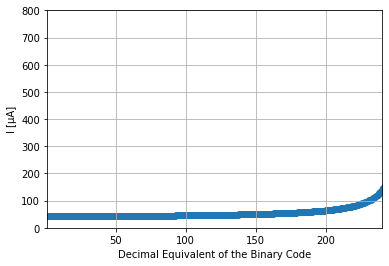

In [10]:
plt.scatter(255 - D, I_OUT * 1000000)
plt.grid()
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.ylabel('I [μA]')
plt.ylim(0,800)
plt.xlim(1,240)
plt.show()

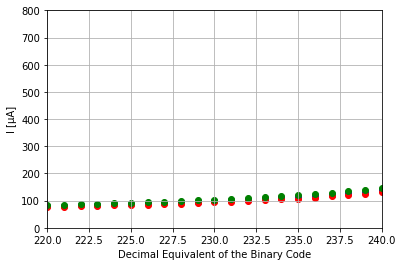

In [11]:
plt.scatter(255 - D, I_OUT * 1000000, color='b')
plt.scatter(255 - D, I_OUT_upper_bound * 1000000, color='r')
plt.scatter(255 - D, I_OUT_lower_bound * 1000000, color ='g')
plt.grid()
plt.xlabel('Decimal Equivalent of the Binary Code')
plt.ylabel('I [μA]')
plt.ylim(0,800)
plt.xlim(220,240)
plt.show()

In [12]:
def dec2hex(dec):
    hex_results = []
    for i in range(len(dec)): 
        hex_results.append(hex(dec[i]))
    return hex_results

In [13]:
df = pd.DataFrame({"Dec":255-D, "Hex":dec2hex(255-D), "Current [μA]": np.around(I_OUT * 1000000,2), "Current [μA] +8%": np.around(I_OUT_upper_bound * 1000000,2),"Current [μA] -8%": np.around(I_OUT_lower_bound * 1000000,2)})

In [14]:
itable.PrettyTable(df)

Dec,Hex,Current [μA],Current [μA] +8%,Current [μA] -8%
255,0xff,4781.72,4430.15,5194.43
254,0xfe,1220.68,1132.89,1323.73
253,0xfd,712.66,662.5,771.54
252,0xfc,509.5,474.39,550.71
251,0xfb,400.12,373.11,431.82
250,0xfa,331.76,309.82,357.51
249,0xf9,284.99,266.51,306.67
248,0xf8,250.97,235.02,269.7
247,0xf7,225.12,211.08,241.6
246,0xf6,204.81,192.27,219.53
